In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



The credit card fraud database can be found at https://www.kaggle.com/mlg-ulb/creditcardfraud.  This capstone project is focused on detecting the credit card fraud activities using clustering.  


## Load the dataset

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.shape

(284807, 31)

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Metrics includes Time, V28 metrics, transaction amount, and the target column 'Class'.  

In [6]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

The average transaction is $88.35.  Only 0.17% (492) of (287407) transctions are fraud (highly unbalanced).

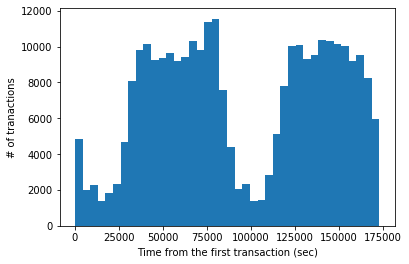

In [7]:
# Plot time
plt.hist(df.Time, bins=40)
plt.xlabel('Time from the first transaction (sec)')
plt.ylabel('# of tranactions')
plt.show()

In [8]:
# Create a new feature:  Time in the day
# since 'Time' is recorded as seconds from the first transaction, ...
# we can make time relevant by substract 86400 from time.... then divided by 86400
# T is the fraction of the time in a day (normalized)


df['T']= [n/86400 if n<86400 else (n-86400)/86400 for n in df['Time']]



import math

# Create logarithm of Amount
# because the original amount is very screwed.  

df['log_amount']=[0 if n<=1 else math.log10(n) for n in df['Amount']]

# Further normalized amount so that the whole dataset is standardized

from sklearn.preprocessing import StandardScaler

df['nor_amount']= StandardScaler().fit_transform(df['log_amount'].values.reshape(-1,1))

df=df.drop(columns=['Time', 'Amount', 'log_amount'])
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,T,nor_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.000000,1.097442
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.000000,-1.111041
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.000012,1.607740
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.000012,0.992002
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.000023,0.679907


## Split the dataset for testing purpose

In [9]:
x= df.drop('Class', axis=1)
y= df['Class']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('Class in training dataset: {}'.format(y_train.value_counts()))
print('Class in testing dataset: {}'.format(y_test.value_counts()))



Class in training dataset: 0    227451
1       394
Name: Class, dtype: int64
Class in testing dataset: 0    56864
1       98
Name: Class, dtype: int64


## Create a more balanced dataset from training dataset
Since more than 99% of the data are fraudulent free, we would like to have a dataset that is more balanced to predict fraud.  Otherwise, the accuracy of 99% does not mean the frauds are labeled.   

In [11]:
# ## oversampling 
# from imblearn.over_sampling import SMOTE
# # Create new dataset X_res, Y_res (res stand for resampling)
# smt=SMOTE(random_state=42)
# x_res, y_res= smt.fit_resample(X_train, y_train)
# # reassign the column names
# X_res= pd.DataFrame(data=x_res, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
#        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
#        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'T', 'log_amount'])
# Y_res=pd.DataFrame(data=y_res, columns=['Class'])

In [12]:
# undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_res2, y_res2 = rus.fit_resample(x, y)
# reassign the column names
X_res2= pd.DataFrame(data=x_res2, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'T', 'log_amount'])
Y_res2=pd.DataFrame(data=y_res2, columns=['Class'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


The major reason to choose the undersampling over oversampling is to reduce the sample size for clustering.  

In [13]:
Y_res2.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

This would create a dataset for the same number of frauds as the non-frauds.  By undersampling the majority group (Class =1), the new dataset contains equal number of Class 0 and Class 1 (492 Cases each, 984 total).

Correlation Map for all

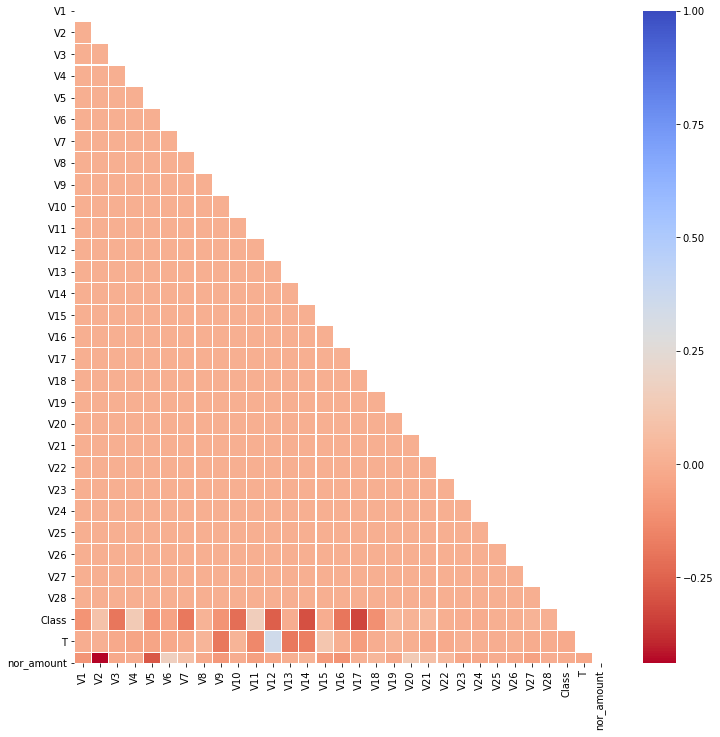

In [14]:
import seaborn as sns

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(12, 12))

sns.heatmap(corr, mask=mask, cmap='coolwarm_r', annot=False, linewidths=.1, fmt= '.1f',ax=ax)
plt.show()

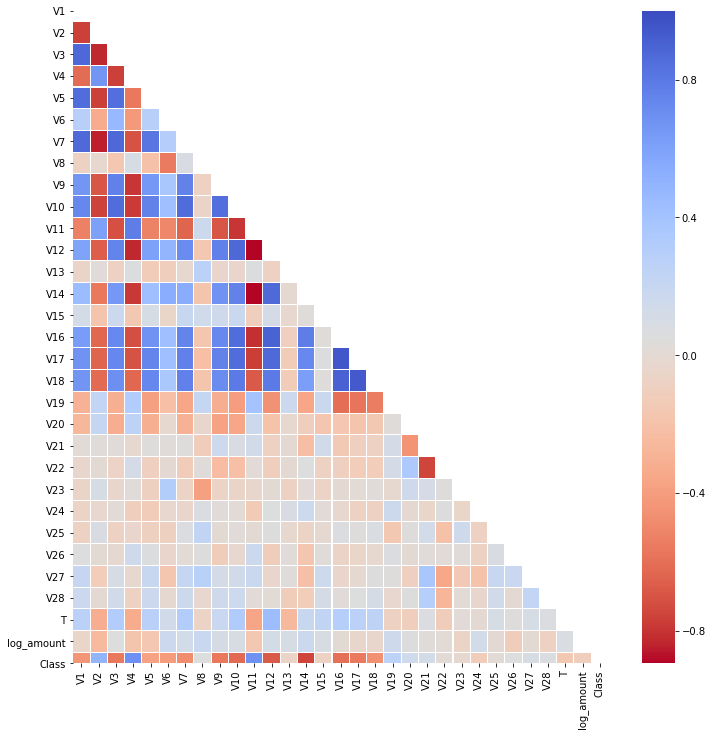

In [15]:
train=pd.concat([X_res2, Y_res2], axis=1)

# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, mask=mask, cmap='coolwarm_r', annot=False, linewidths=.1, fmt= '.1f',ax=ax)
plt.show()

V1, V3, V5, V7, V9, V10, V12, V14, V16, V17 and V18 are inversely correlated to Class while V2, V4 and V11 are highly correlated in the Resampled dataset. 

In [16]:
train.shape

(984, 31)

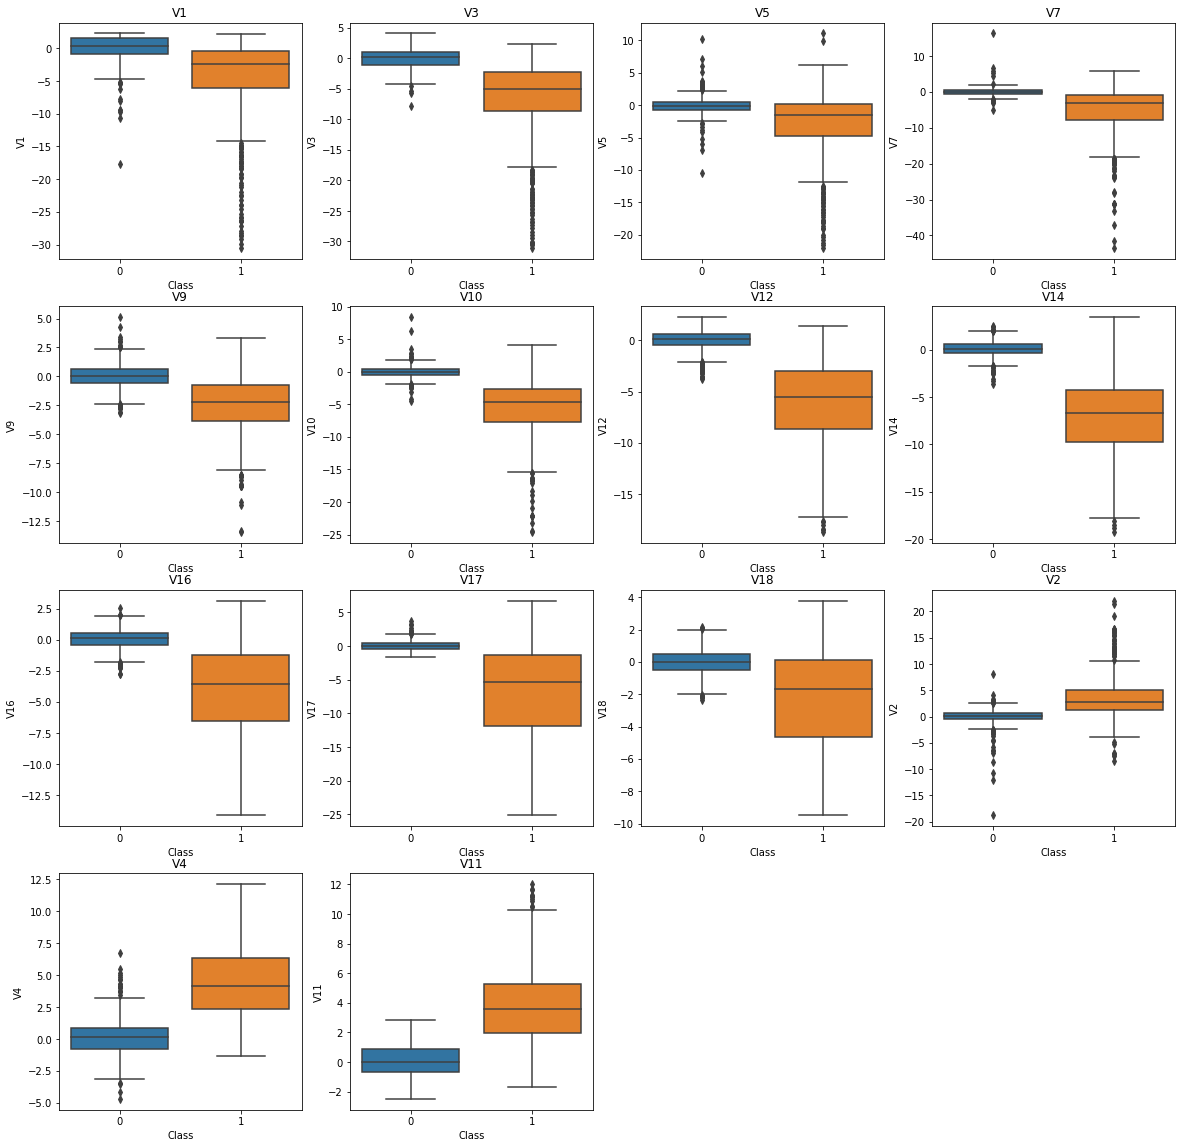

In [17]:
import seaborn as sns

columns_of_interest=['V1', 'V3', 'V5', 'V7', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V18', 'V2','V4','V11']

# f, axes = plt.subplots(ncols=4, figsize=(20,4))
# sns.boxplot(x="Class", y="V17", data=train, ax=axes[0])
# axes[0].set_title('V17 vs Class Negative Correlation')

plt.figure(figsize=(20,20))

for i, column in enumerate(columns_of_interest, start = 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x="Class", y=column, data=train)
    plt.title(column)    

plt.show()


# Clustering

## K-Means

We applied 2-components and use the 2-components for plotting.  The data were divided into 4 equal datasets (X1, X2, X3, X4).  After K-Means clustering, the plots shows the clusters in each parts.  The idea is to observe the similarities of clustering in each datsets

In [18]:
from sklearn.cluster import KMeans
# Data frame to store features and predicted cluster memberships.
y_pred = pd.DataFrame()

# Create the two-feature PCA for graphing purposes.

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_res2)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_res2,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.

from sklearn import metrics
from sklearn.metrics import pairwise_distances

scores=[]
column_names=[]

for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    y_pred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    y_pred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 10.
    for nclust in range(2, 11):
        model = KMeans(n_clusters=nclust, random_state=42).fit(data[0])
        pred = model.predict(data[0])
        y_pred['clust' + str(nclust) + '_sample' + str(counter)] = pred
        labels = model.labels_
        number_cluster = str(nclust)+'_cluster' 
        column_names.append(number_cluster)
        sil_score=metrics.silhouette_score(data[0], labels, metric='euclidean')
        scores.append(sil_score)

In [19]:
silhouette_scores=pd.DataFrame(np.reshape(scores, (-1, 9)), columns=column_names[0:9])
silhouette_scores.index.name='Sample'

In [20]:
silhouette_scores

,2_cluster,3_cluster,4_cluster,5_cluster,6_cluster,7_cluster,8_cluster,9_cluster,10_cluster
Sample,,,,,,,,,
0,0.593806,0.462484,0.464102,0.392380,0.401189,0.378264,0.372653,0.313117,0.180051
1,0.661705,0.648774,0.469583,0.473045,0.483369,0.426367,0.437674,0.415378,0.388271
2,0.630700,0.463854,0.474308,0.488196,0.494992,0.475943,0.442992,0.447807,0.458146
3,0.617729,0.449051,0.449201,0.445313,0.391453,0.394092,0.398562,0.388020,0.391696


In [21]:
silhouette_scores.describe().T.sort_values(['std'], ascending=True)

,count,mean,std,min,25%,50%,75%,max
4_cluster,4.0,0.464299,0.010895,0.449201,0.460377,0.466842,0.470764,0.474308
2_cluster,4.0,0.625985,0.028295,0.593806,0.611749,0.624215,0.638451,0.661705
8_cluster,4.0,0.412970,0.033390,0.372653,0.392085,0.418118,0.439004,0.442992
5_cluster,4.0,0.449733,0.042158,0.392380,0.432080,0.459179,0.476833,0.488196
7_cluster,4.0,0.418667,0.043113,0.378264,0.390135,0.410230,0.438761,0.475943
6_cluster,4.0,0.442751,0.053969,0.391453,0.398755,0.442279,0.486275,0.494992
9_cluster,4.0,0.391080,0.057434,0.313117,0.369294,0.401699,0.423485,0.447807
3_cluster,4.0,0.506041,0.095390,0.449051,0.459126,0.463169,0.510084,0.648774
10_cluster,4.0,0.354541,0.120691,0.180051,0.336216,0.389983,0.408308,0.458146


The std at 4_cluster is the smallest (0.011), which indicates that the similarity in each cluster.  

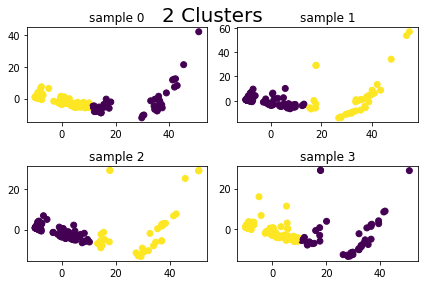

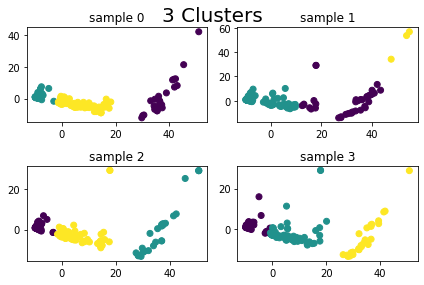

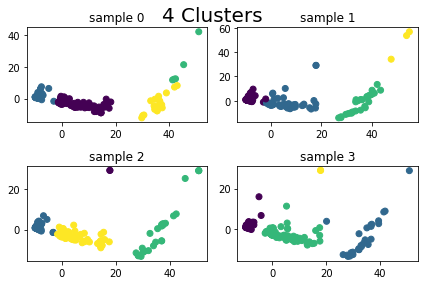

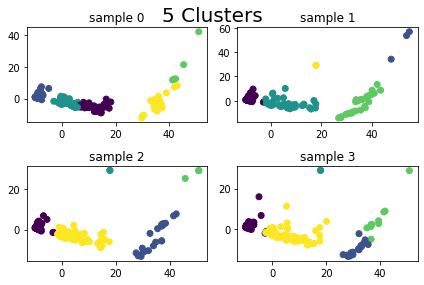

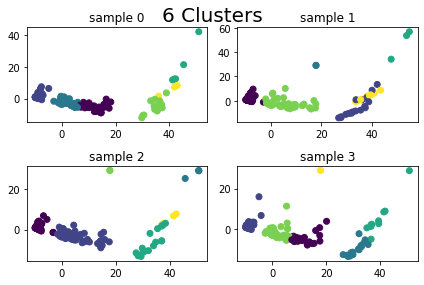

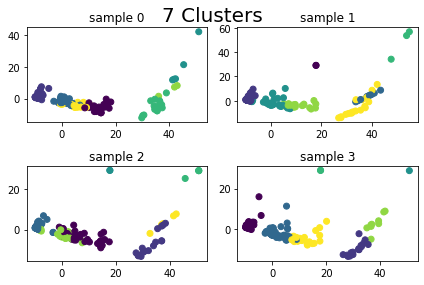

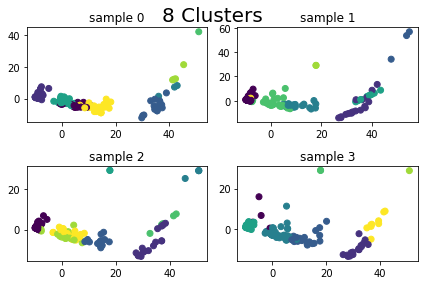

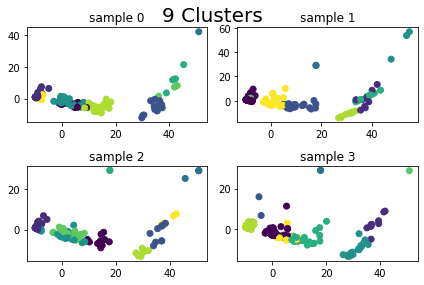

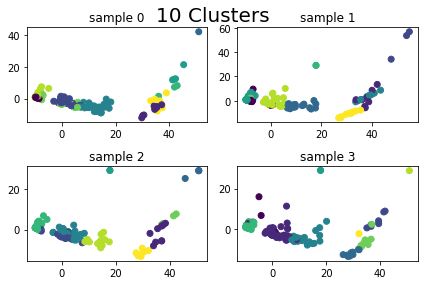

In [22]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 11):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = y_pred['pca_f1_sample{}'.format(i)]
        y_sub = y_pred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = y_pred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
#         axarr[rows, cols].set_xlim([-.3, .3])
#         axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

Using 4-clusters, the data points in each cluster shows similarities.  

In [23]:
# use 4 clusters
nclust=4
y_pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(X_res2)
y_pred = pd.DataFrame(y_pred, columns=['pred'])

In [24]:
y_pred.shape

(984, 1)

In [25]:
y_pred.pred.value_counts()

2    600
1    277
0     97
3     10
Name: pred, dtype: int64

In [26]:
Y_res2.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [27]:
# reconstruct the results X-pca with Y_true, Y_pred
X_pca = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([X_pca, Y_res2, y_pred], axis = 1)

We are using the 'Class' (target) feature to help determine how the clustering works.  Below shows the 4 clusters labeled in colors (0 = no fraud, 1= fraud).

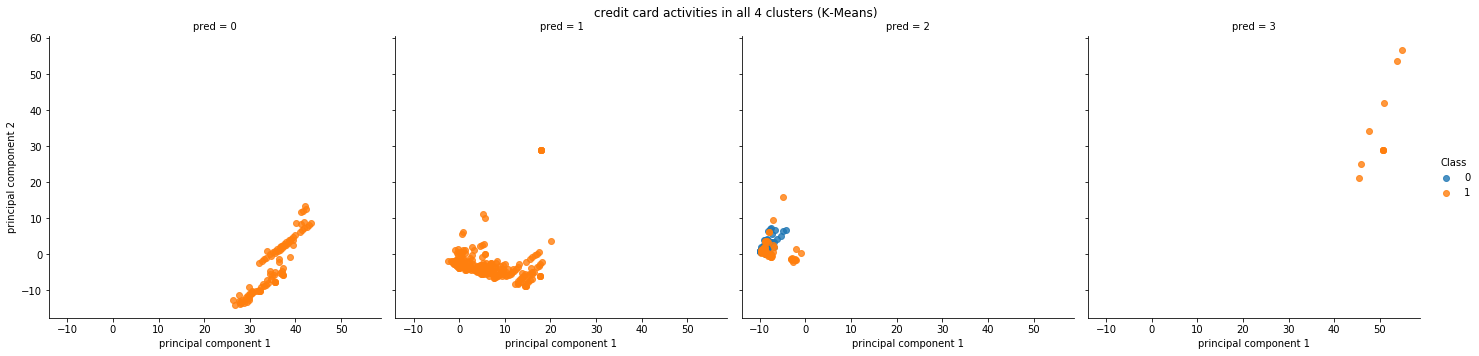

In [28]:
g =sns.lmplot(data=finalDf, x='principal component 1', y='principal component 2', hue='Class', col='pred', 
           fit_reg=False, legend=True, legend_out=True)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('credit card activities in all 4 clusters (K-Means)')

plt.show()

Interestingly all the non-fraud shows up in pred=2 cluster.  Based on the observation of the two plots above, we are going to regroup the cluster 0,1, and 3 into the positive group(class=1).  Cluster 2 is the negative group (class =0).

In [29]:
# create the column name 'pred2', the predictive result from the K-mean after regroup. 
finalDf.loc[(finalDf['pred']==3), 'pred2']=1
finalDf.loc[(finalDf['pred']==2), 'pred2']=0
finalDf.loc[(finalDf['pred']==1), 'pred2']=1
finalDf.loc[(finalDf['pred']==0), 'pred2']=1
finalDf['pred2']=finalDf['pred2'].astype(int)

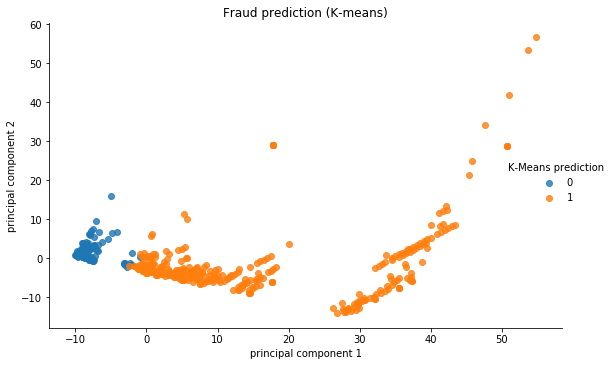

In [30]:
# Plotting after regrouping

g= sns.lmplot(data=finalDf, x='principal component 1', y='principal component 2', hue='pred2', 
           fit_reg=False, legend=True, legend_out=True, height=5, aspect=1.6)
g._legend.set_title('K-Means prediction')
plt.title('Fraud prediction (K-means)')
plt.show()

Comparing the prediction from K-Mean to 'Class'

In [31]:
# confusion matric 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(finalDf['Class'], finalDf['pred2'])
display(cm)

array([[492,   0],
       [108, 384]], dtype=int64)

In [32]:
# classification report: the focus is f1-score and recall
from sklearn.metrics import classification_report
print(classification_report(finalDf['Class'], finalDf['pred2'], digits=4))

              precision    recall  f1-score   support

           0     0.8200    1.0000    0.9011       492
           1     1.0000    0.7805    0.8767       492

    accuracy                         0.8902       984
   macro avg     0.9100    0.8902    0.8889       984
weighted avg     0.9100    0.8902    0.8889       984



With K-mean clustering, all 492 negative cases are called.  There are 108 false negative cases and no false positive case. Recall is 0.7805 and f1 is 0.8767. 

# Mean Shift clustering

In [33]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_res2, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_res2)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 4


The mean shift clustering also shows 4 clusters.  

In [34]:
# The results from Mean shift clustering is called 'pred3'
y_pred=pd.DataFrame(labels, columns=['pred3'])
finalDf = pd.concat([finalDf, y_pred], axis = 1)

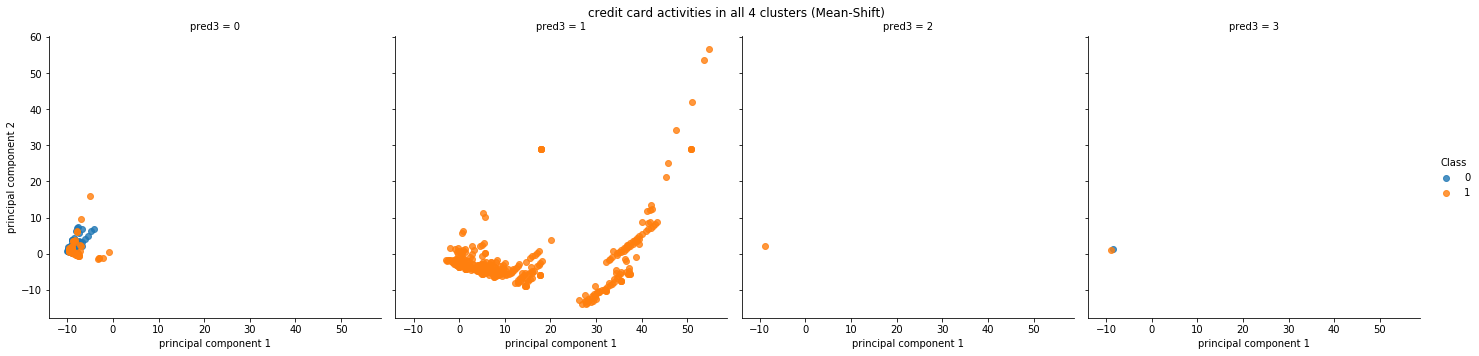

In [35]:
# Plotting Mean Shift clustering
g = sns.lmplot(data=finalDf, x='principal component 1', y='principal component 2', hue='Class', col='pred3', 
           fit_reg=False, legend=True, legend_out=True)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('credit card activities in all 4 clusters (Mean-Shift)')


plt.show()

Based on the observation, we can regroup the pred3 = 1, 2, 3 in to a new positive group.  Pred3=0 is the negative group

In [36]:
# create 'pred4' for the Mean shift regroup predictive results
finalDf.loc[(finalDf['pred3']==3), 'pred4']=1
finalDf.loc[(finalDf['pred3']==2), 'pred4']=1
finalDf.loc[(finalDf['pred3']==1), 'pred4']=1
finalDf.loc[(finalDf['pred3']==0), 'pred4']=0
finalDf['pred4']=finalDf['pred4'].astype(int)

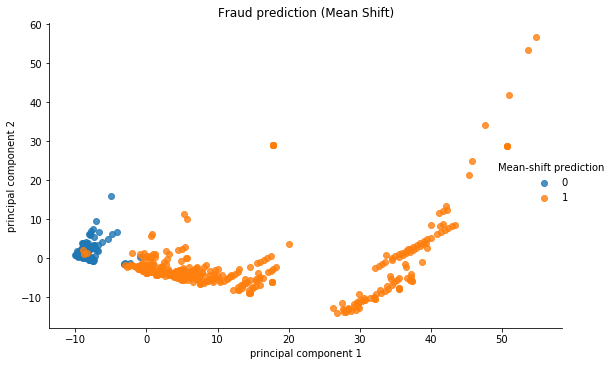

In [37]:
# Plot the Mean Shift clustering after regroup 'pred4'
g= sns.lmplot(data=finalDf, x='principal component 1', y='principal component 2', hue='pred4', 
           fit_reg=False, legend=True, legend_out=True, height=5, aspect=1.6)
g._legend.set_title('Mean-shift prediction')
plt.title('Fraud prediction (Mean Shift)')
plt.show()

Comparing the Mean shift prediction to the target: 

In [38]:
# confusion matrix 
cm = confusion_matrix(finalDf['Class'], finalDf['pred4'])
display(cm)

array([[491,   1],
       [101, 391]], dtype=int64)

In [39]:
# Classification Report: focus on recall and f1-score
print(classification_report(finalDf['Class'], finalDf['pred4'], digits=4))

              precision    recall  f1-score   support

           0     0.8294    0.9980    0.9059       492
           1     0.9974    0.7947    0.8846       492

    accuracy                         0.8963       984
   macro avg     0.9134    0.8963    0.8953       984
weighted avg     0.9134    0.8963    0.8953       984



In confusion matrix, true negative is 491, True positive is 391.  There are 101 false negative cases and 1 false positive cases. The recall is 0.7947 and the f1 is 0.8846.

# Other methods for evaluating number of clusters in K-Mean

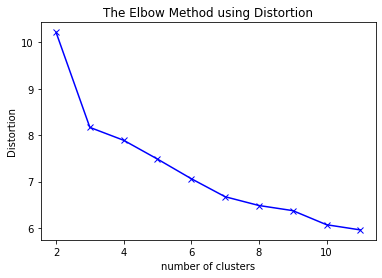

In [40]:
# elbow method
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 12)
for k in K:
    #Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_res2)
    kmeanModel.fit(X_res2)    

    # distortion method
    distortions.append(sum(np.min(cdist(X_res2, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / X_res2.shape[0])
    mapping1[k] = sum(np.min(cdist(X_res2, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / X_res2.shape[0]
#     # inertia method
#     inertias.append(kmeanModel.inertia_)
#     mapping2[k] = kmeanModel.inertia_

# Distortion method:          
#It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the #Euclidean distance metric is used

#for key,val in mapping1.items():
#    print(str(key)+' : '+str(val))

plt.plot(K, distortions, 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


The more cluster, the small distortion.  The distortion is flatten out after k=10.  We see the first elbow at k=3.  In deed, even at k=3, we were able to regroup the clusters and find a good predicting results. Te elbow method show the  

# Conclusions

In this capstone project, unsupervised machine learning, in particular, clustering, was applied to the detect credit card fraudulent activities.  K-means clustering and Mean-shift clustering are able to detect 78% and 79% of the fraud activities, respectively. The Mean-shift is slightly better than K-Means in term of recall and f1-score.  